<a href="https://colab.research.google.com/github/Bahaakhalled/TSF-Tasks/blob/main/EDA_on_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [81]:
data_path='SampleSuperstore.csv'
retail=pd.read_csv(data_path)

In [82]:
retail.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [83]:
retail.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [84]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [85]:
retail.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [86]:
loss=retail.loc[retail.Profit < 0]

In [87]:
loss=loss.drop('Postal Code',axis=1)

In [88]:
loss['Profit']=loss.Profit.map(lambda m:m*-1)

In [89]:
loss.Country.unique()

array(['United States'], dtype=object)

In [90]:
loss.City.unique()

array(['Fort Lauderdale', 'Fort Worth', 'Philadelphia', 'Richardson',
       'Houston', 'Chicago', 'Memphis', 'Portland', 'Aurora', 'Bristol',
       'Bloomington', 'Phoenix', 'Los Angeles', 'Columbus', 'San Antonio',
       'Newark', 'Denver', 'Dallas', 'Medina', 'Dublin', 'Columbia',
       'Charlotte', 'Tampa', 'Pasadena', 'Cincinnati', 'Tamarac',
       'Colorado Springs', 'San Francisco', 'Austin', 'New York City',
       'Tucson', 'Franklin', 'Pembroke Pines', 'Peoria', 'Gastonia',
       'Jacksonville', 'Akron', 'Concord', 'Decatur', 'Park Ridge',
       'Amarillo', 'Parker', 'Springfield', 'Salem', 'Grove City',
       'Arlington', 'Tyler', 'Burlington', 'Chester', 'Long Beach',
       'Oceanside', 'Naperville', 'San Diego', 'Lancaster', 'Garland',
       'Mesa', 'Round Rock', 'Wilmington', 'Scottsdale', 'Rockford',
       'Miami', 'Toledo', 'Brownsville', 'Yonkers', 'Encinitas',
       'Coral Springs', 'Boynton Beach', 'Greenville', 'Deltona',
       'Lorain', 'Evanston', 'Vin

In [91]:
loss.groupby('Ship Mode').sum().sort_values(by='Profit')

,Sales,Quantity,Discount,Profit
Ship Mode,,,,
Same Day,28460.8410,370,45.95,8898.1054
First Class,61560.1024,1102,144.52,22660.2709
Second Class,81192.5249,1136,143.05,24224.3729
Standard Class,297493.6865,4432,566.22,100348.5365


In [92]:
loss.groupby(['State','City']).sum().sort_values(by='Profit')

,,Sales,Quantity,Discount,Profit
State,City,,,,
Texas,Coppell,16.7840,1,0.20,0.2098
Florida,Homestead,2.9440,1,0.20,0.6624
Ohio,Elyria,1.8240,1,0.70,1.3984
Florida,Pensacola,2.2140,3,0.70,1.4760
Colorado,Loveland,4.2120,5,0.90,1.5948
...,...,...,...,...,...
Ohio,Lancaster,6908.2810,45,6.10,7378.6382
Texas,San Antonio,17395.1450,139,17.10,7831.0254
Illinois,Chicago,19910.0120,541,88.20,11120.6271


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 74.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 55.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 32.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


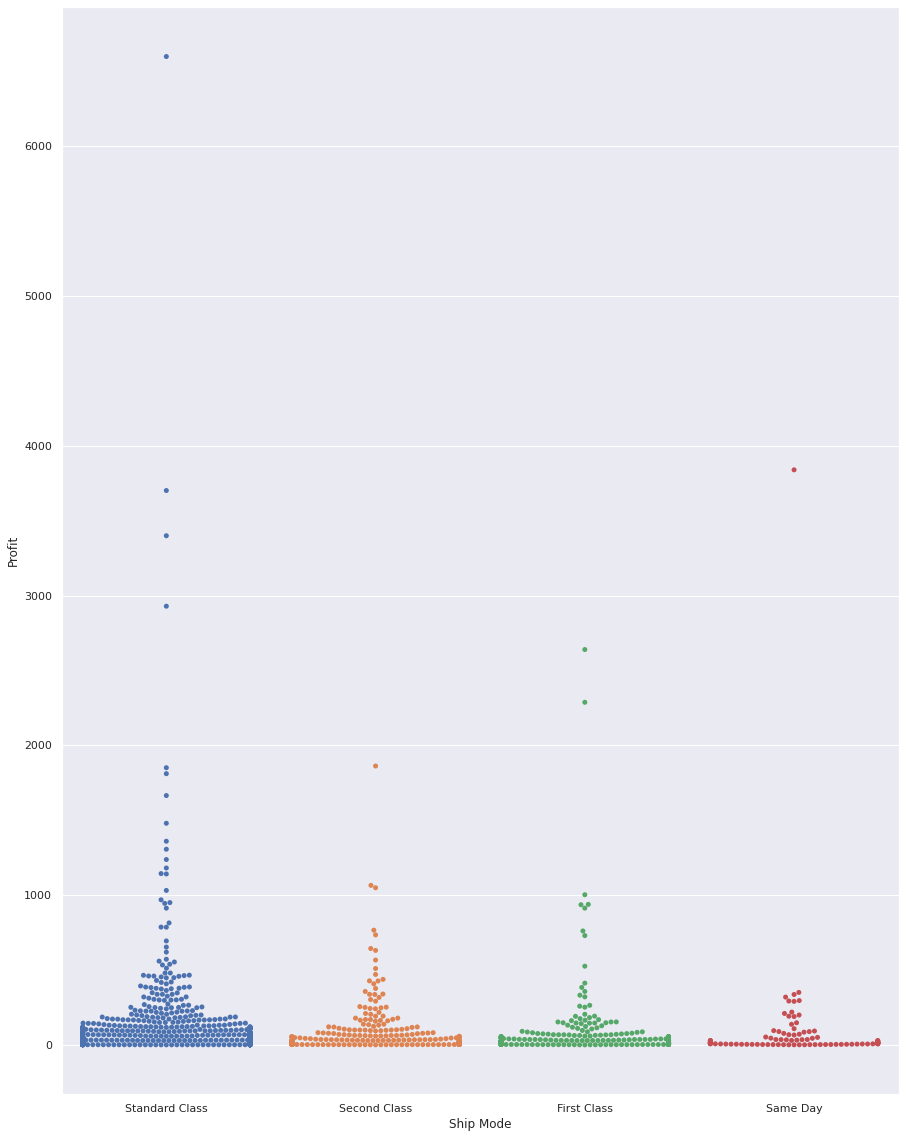

In [93]:
sns.swarmplot(x=loss['Ship Mode'],y=loss['Profit'])

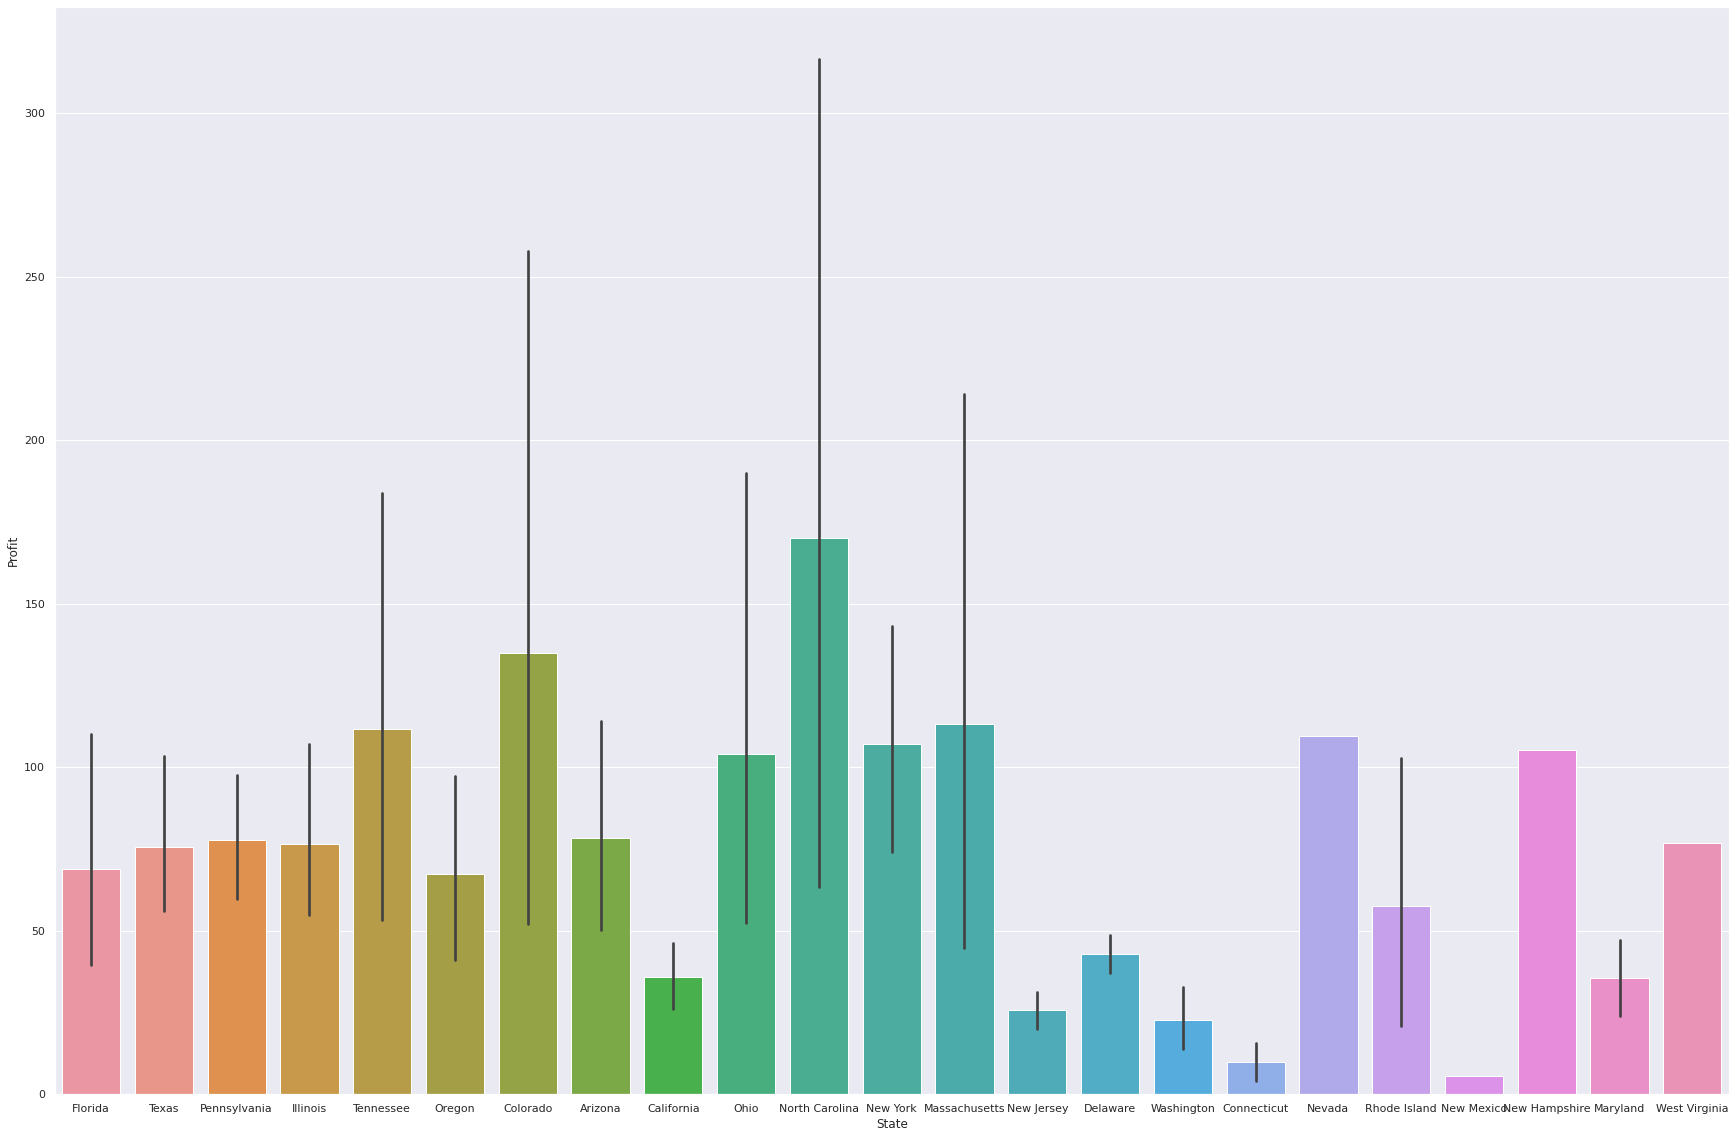

In [94]:

k=sns.barplot(x=loss['State'],y=loss['Profit'])
k.figure.set_figwidth(30)

In [95]:
num_cols=loss.select_dtypes(exclude='object').columns
#num_cols=num_cols.drop('Postal Code')
num_cols

KeyError: ignored

In [96]:
loss.groupby(['Region','City']).sum().sort_values(by='Profit')

Sales  Quantity  Discount      Profit
Region  City                                                    
Central Coppell          16.7840         1      0.20      0.2098
South   Homestead         2.9440         1      0.20      0.6624
East    Elyria            1.8240         1      0.70      1.3984
South   Pensacola         2.2140         3      0.70      1.4760
West    Loveland          4.2120         5      0.90      1.5948
...                          ...       ...       ...         ...
East    Lancaster      7699.2420        71      9.40   7632.4946
Central San Antonio   17395.1450       139     17.10   7831.0254
        Chicago       19910.0120       541     88.20  11120.6271
        Houston       37640.7304       683    104.14  14785.3668
East    Philadelphia  70460.5510       892    115.30  19590.7411

[240 rows x 4 columns]

In [104]:
loss.groupby(['Category','Sub-Category']).sum().sort_values(by='Profit',ascending=False)

Sales  Quantity  Discount      Profit
Category        Sub-Category                                             
Office Supplies Binders        36140.6130      2456    452.40  38510.4964
Furniture       Tables        104978.5460       757     74.15  32412.1483
Technology      Machines       72456.2530       157     25.60  30118.6682
Furniture       Bookcases      48072.7408       422     37.99  12152.2060
                Chairs         91988.4560       876     61.40   9880.8413
Office Supplies Appliances      3382.5340       235     53.60   8629.6412
Technology      Phones         35797.8400       476     46.60   7530.6235
Furniture       Furnishings    12845.8440       597     88.60   6490.9134
Office Supplies Storage        37869.0720       569     32.20   6426.3038
                Supplies       14067.1760       110      6.60   3015.6219
Technology      Accessories    10958.8000       330     18.20    930.6265
Office Supplies Fasteners        149.2800        55      2.40     33.1952

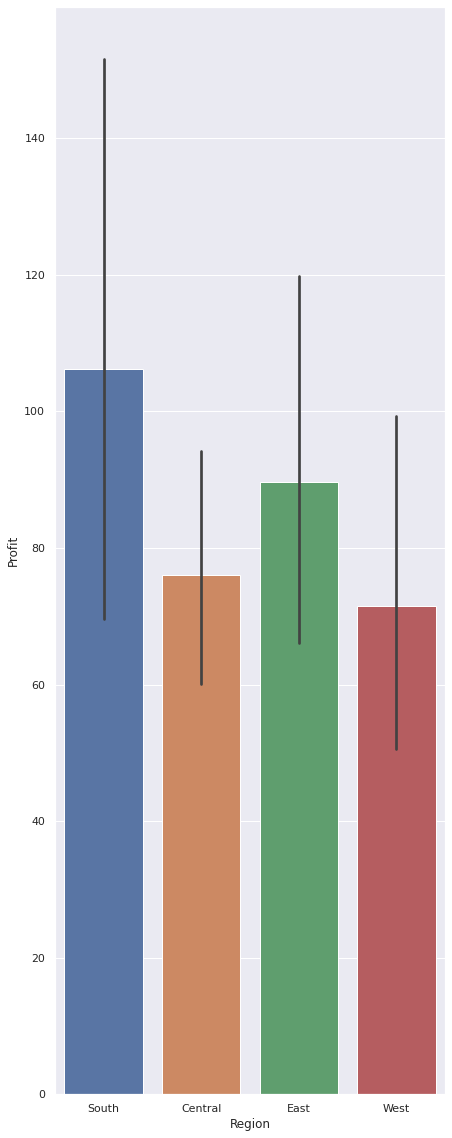

In [101]:
k=sns.barplot(x=loss['Region'],y=loss['Profit'],)
k.figure.set_figwidth(7)

In [102]:
loss.groupby('Category').sum()

,Sales,Quantity,Discount,Profit
Category,,,,
Furniture,257885.5868,2652,262.14,60936.1090
Office Supplies,91608.6750,3425,547.20,56615.2585
Technology,119212.8930,963,90.40,38579.9182
